This is a IPython notebook that contains both the answers and the corresponding code for the problems in Test Exercise 3. All code is written is in Python 3 and the text is generated using Markdown.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')
%matplotlib inline

/anaconda/envs/research/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel('_a367fe65dc319a76cea3558922a4174d_TestExer-3-TaylorRule-round1.xlsx')

In [3]:
df.head()

,OBS,INTRATE,INFL,PROD,UNEMPL,COMMPRI,PCE,PERSINC,HOUST
0,1960:1,3.99,1.24095,10.03653,3.41845,7.95262,5.70962,1.68419,-11.88896
1,1960:2,3.97,1.41379,6.96248,3.46575,-8.55856,5.06452,1.33094,-9.83803
2,1960:3,3.84,1.51881,4.49681,2.71993,-16.83599,5.55733,0.89195,-31.54321
3,1960:4,3.92,1.93237,1.50624,2.79820,-5.03145,7.77351,0.67636,-18.93082
4,1960:5,3.85,1.82507,-0.11398,1.72552,-12.44240,4.39179,0.33667,-15.15354


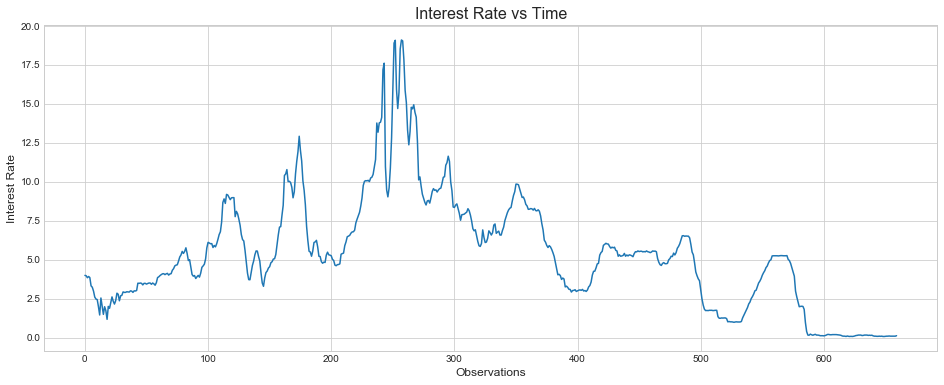

In [4]:
plt.figure(figsize=(16,6))
plt.plot(df['INTRATE'])
plt.title('Interest Rate vs Time', fontsize=16)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12);

In [5]:
df['INTRATE_diff'] = df['INTRATE'].diff()

In [6]:
df.head()

,OBS,INTRATE,INFL,PROD,UNEMPL,COMMPRI,PCE,PERSINC,HOUST,INTRATE_diff
0,1960:1,3.99,1.24095,10.03653,3.41845,7.95262,5.70962,1.68419,-11.88896,NaN
1,1960:2,3.97,1.41379,6.96248,3.46575,-8.55856,5.06452,1.33094,-9.83803,-0.02
2,1960:3,3.84,1.51881,4.49681,2.71993,-16.83599,5.55733,0.89195,-31.54321,-0.13
3,1960:4,3.92,1.93237,1.50624,2.79820,-5.03145,7.77351,0.67636,-18.93082,0.08
4,1960:5,3.85,1.82507,-0.11398,1.72552,-12.44240,4.39179,0.33667,-15.15354,-0.07


### Check for stationarity

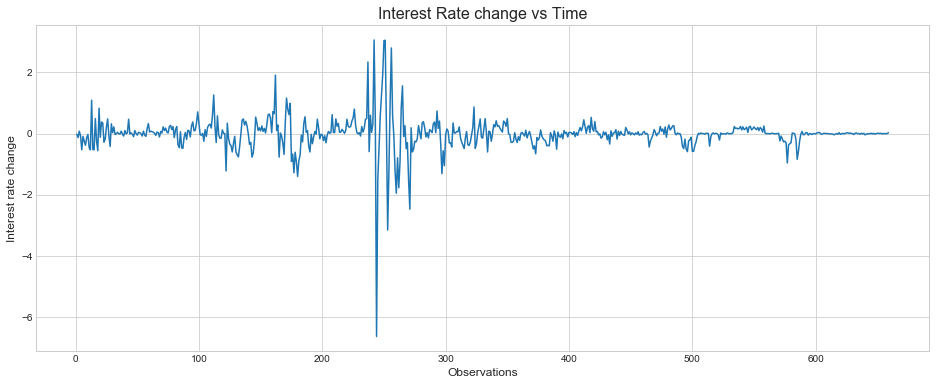

In [7]:
plt.figure(figsize=(16,6))
plt.plot(df['INTRATE_diff'])
plt.title('Interest Rate change vs Time', fontsize=16)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Interest rate change', fontsize=12);

The data distribution appears to be stationary with a few deviations around observations 225 - 275.

# Part (a)

The AIC and BIC scores increase on dropping `COMMPRI`. So, we keep `COMMPRI` in the model and the final model contains 5 explanatory variables.  

`INFL`, `COMMPRI`, `PCE`, `PERSINC`, `HOUST`

In [8]:
X = pd.concat([df['INFL'], df['PROD'], df['UNEMPL'], df['COMMPRI'], df['PCE'], df['PERSINC'], df['HOUST']], axis=1)
y = df['INTRATE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.64e-139
Time:                        00:08:18   Log-Likelihood:                -1449.2
No. Observations:                 660   AIC:                             2914.
Df Residuals:                     652   BIC:                             2950.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2212      0.245     -0.903      0.3

### Drop `UNEMPL`.

In [9]:
X = pd.concat([df['INFL'], df['PROD'], df['COMMPRI'], df['PCE'], df['PERSINC'], df['HOUST']], axis=1)
y = df['INTRATE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.99e-140
Time:                        00:08:18   Log-Likelihood:                -1449.7
No. Observations:                 660   AIC:                             2913.
Df Residuals:                     653   BIC:                             2945.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2909      0.236     -1.232      0.2

### Drop `PROD`.

In [10]:
X = pd.concat([df['INFL'], df['COMMPRI'], df['PCE'], df['PERSINC'], df['HOUST']], axis=1)
y = df['INTRATE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     229.9
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          2.03e-141
Time:                        00:08:18   Log-Likelihood:                -1450.2
No. Observations:                 660   AIC:                             2912.
Df Residuals:                     654   BIC:                             2939.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2401      0.230     -1.042      0.2

### Drop `COMMPRI`.

In [11]:
X = pd.concat([df['INFL'], df['PCE'], df['PERSINC'], df['HOUST']], axis=1)
y = df['INTRATE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     282.3
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          6.18e-141
Time:                        00:08:18   Log-Likelihood:                -1454.3
No. Observations:                 660   AIC:                             2919.
Df Residuals:                     655   BIC:                             2941.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2136      0.231     -0.923      0.3

# Part (b)

The AIC and BIC scores increase on adding `PROD` and `UNEMPL`. So, we do not include `PROD` and `UNEMPL` in the model and the final model contains 5 explanatory variables.  

`INFL`, `COMMPRI`, `PCE`, `PERSINC`, `HOUST`  

The model is same as the one obtained in Part (a).

In [12]:
def regression(feature_list):
    X = feature_list
    y = df['INTRATE']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

In [13]:
features = [df['INFL'], df['PROD'], df['UNEMPL'], df['COMMPRI'], df['PCE'], df['PERSINC'], df['HOUST']]

for f in features:
    pd.concat([f], axis=1)
    model = regression(f)
    print("\n##############################################################################")
    print("##############################################################################\n")
    print(model.summary())


##############################################################################
##############################################################################

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     836.6
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          2.47e-119
Time:                        00:08:18   Log-Likelihood:                -1514.2
No. Observations:                 660   AIC:                             3032.
Df Residuals:                     658   BIC:                             3041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.106
Date:                Tue, 10 Apr 2018   Prob (F-statistic):              0.147
Time:                        00:08:18   Log-Likelihood:                -1783.9
No. Observations:                 660   AIC:                             3572.
Df Residuals:                     658   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1245      0.208     24.586      0.0

### Select `INFL`.

In [14]:
features = [df['PROD'], df['UNEMPL'], df['COMMPRI'], df['PCE'], df['PERSINC'], df['HOUST']]

for f in features:
    f1 = pd.concat([df['INFL'], f], axis=1)
    model = regression(f1)
    print("\n##############################################################################")
    print("##############################################################################\n")
    print(model.summary())


##############################################################################
##############################################################################

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     443.9
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.06e-122
Time:                        00:08:18   Log-Likelihood:                -1502.8
No. Observations:                 660   AIC:                             3012.
Df Residuals:                     657   BIC:                             3025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

### Select `PERSINC`.

In [15]:
features = [df['PROD'], df['UNEMPL'], df['COMMPRI'], df['PCE'], df['HOUST']]

for f in features:
    f1 = pd.concat([df['INFL'], df['PERSINC'], f], axis=1)
    model = regression(f1)
    print("\n##############################################################################")
    print("##############################################################################\n")
    print(model.summary())


##############################################################################
##############################################################################

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     346.0
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.15e-134
Time:                        00:08:18   Log-Likelihood:                -1471.9
No. Observations:                 660   AIC:                             2952.
Df Residuals:                     656   BIC:                             2970.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

### Select `PCE`.

In [16]:
features = [df['PROD'], df['UNEMPL'], df['COMMPRI'], df['HOUST']]

for f in features:
    f1 = pd.concat([df['INFL'], df['PERSINC'], df['PCE'], f], axis=1)
    model = regression(f1)
    print("\n##############################################################################")
    print("##############################################################################\n")
    print(model.summary())


##############################################################################
##############################################################################

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     268.1
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          2.50e-136
Time:                        00:08:19   Log-Likelihood:                -1465.0
No. Observations:                 660   AIC:                             2940.
Df Residuals:                     655   BIC:                             2962.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

### Select `HOUST`.

In [17]:
features = [df['PROD'], df['UNEMPL'], df['COMMPRI']]

for f in features:
    f1 = pd.concat([df['INFL'], df['PERSINC'], df['PCE'], df['HOUST'], f], axis=1)
    model = regression(f1)
    print("\n##############################################################################")
    print("##############################################################################\n")
    print(model.summary())


##############################################################################
##############################################################################

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     227.5
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.76e-140
Time:                        00:08:19   Log-Likelihood:                -1452.4
No. Observations:                 660   AIC:                             2917.
Df Residuals:                     654   BIC:                             2944.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

### Select `COMMPRI`.

In [18]:
features = [df['PROD'], df['UNEMPL']]

for f in features:
    f1 = pd.concat([df['INFL'], df['PERSINC'], df['PCE'], df['HOUST'], df['COMMPRI'], f], axis=1)
    model = regression(f1)
    print("\n##############################################################################")
    print("##############################################################################\n")
    print(model.summary())


##############################################################################
##############################################################################

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.99e-140
Time:                        00:08:19   Log-Likelihood:                -1449.7
No. Observations:                 660   AIC:                             2913.
Df Residuals:                     653   BIC:                             2945.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

# Part (c)

Model using the *Taylor rule of equation*.  

| Parameters    | Model (a)     | Taylor rule  |
| ------------- |:-------------:| ------------:|
| R-squared     | 0.633         |    0.575     | 
| AIC           | 2919          |    3012      |
| BIC           | 2941          |    3025      |

Since, the AIC, and the BIC scores of the model in Part (a) are lower than that of Taylor rule, so the model obtained in Part (a) is better. Also, the R-squared of the model in Part (a) is higher.

In [19]:
X = pd.concat([df['INFL'], df['PROD']], axis=1)
y = df['INTRATE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     443.9
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.06e-122
Time:                        00:08:19   Log-Likelihood:                -1502.8
No. Observations:                 660   AIC:                             3012.
Df Residuals:                     657   BIC:                             3025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2489      0.176      7.088      0.0

# Part (d)

**RESET test**  
Taking p = 1.  

The `p value` of the $\gamma$ cofficient is 0.112 and hence it is not significant. So we can conclude that H0 (null hypothesis) is correct. In other words we can consider $\gamma = 0$.

In [20]:
y_pred = model.predict(X)
df['y_pred_2'] = y_pred**2

In [21]:
X = pd.concat([df['INFL'], df['PROD'], df['y_pred_2']], axis=1)
y = df['INTRATE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     297.5
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          7.14e-122
Time:                        00:08:19   Log-Likelihood:                -1501.5
No. Observations:                 660   AIC:                             3011.
Df Residuals:                     656   BIC:                             3029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9841      0.242      4.065      0.0

### Chow break test

$$F = \frac{(S0 - S1 - S2)/k}{(S1 + S2)/(n - 2k)}$$

In [22]:
X = pd.concat([df['INFL'], df['PROD']], axis=1)
y = df['INTRATE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     443.9
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          1.06e-122
Time:                        00:08:19   Log-Likelihood:                -1502.8
No. Observations:                 660   AIC:                             3012.
Df Residuals:                     657   BIC:                             3025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2489      0.176      7.088      0.0

In [23]:
X1 = X[:240]
y1 = y[:240]
X2 = X[240:]
y2 = y[240:]

In [24]:
model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     457.2
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           4.50e-82
Time:                        00:08:19   Log-Likelihood:                -382.71
No. Observations:                 240   AIC:                             771.4
Df Residuals:                     237   BIC:                             781.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4490      0.182      7.959      0.0

In [25]:
y2 = df['INTRATE'][240:]
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                INTRATE   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     290.2
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           1.09e-79
Time:                        00:08:19   Log-Likelihood:                -1001.9
No. Observations:                 420   AIC:                             2010.
Df Residuals:                     417   BIC:                             2022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7068      0.234      3.022      0.0

In [26]:
S0 = sum((df['INTRATE'] - y_pred)**2)

In [27]:
y_pred1 = model1.predict(X1)
y_pred2 = model2.predict(X2)

In [28]:
S1 = sum((y1 - y_pred1)**2)
S2 = sum((y2 - y_pred2)**2)

In [29]:
F = ((S0 - S1 - S2)*(660 - 4))/((S1 + S2)*2)
print("Chow break test = {:.4f}".format(F))

Chow break test = 43.2343


Chow break test = 43.2343  

We can safely reject the null hypothesis (H0). We do not reject the alternative hypothesis that the models is a combination of two linear regression model over two sets of data divided at the break date Januray 1980.

### Chow Forecast test

$$F = \frac{(S0 - S1)/n_{2}}{S1/(n_{1} - k)}$$

In [30]:
F = ((S0 - S1)*(240 - 2))/(S1*420)
print("Chow forecast test = {:.4f}".format(F))

Chow forecast test = 5.5338


Chow forecast test = 5.5338

We can safely reject the null hypothesis (H0). We can say that the alternative hypothesis is true that the 2nd regression line after the break provides a good fit as the coefficient is significant.

### Jarque-Bera test

The high JB test value, 12.44 from Taylor equation suggests that the residuals are not normally distributed. This tells us that the model is not good.

The JB test values in the Chow break test gives JB values of 2.31 and 4.96. This indicates that the regression model is a better fit when the data is divided into 2 parts on the basis of time (break date January 1980).